# Time Series - Product Demand Forecasting

# 1. Introduction

The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.

This dataset is all real-life data and products/warehouse and category information encoded.

# 2. Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/Historical Product Demand.csv', encoding='utf-8')

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
type(df.Date[0]) #Here the type of date is str. We need to change it to the datetime type

str

In [5]:
df_null_percentage = 100 * df.isnull().sum()/len(df)

df_null_percentage

#We have a very less null percentage here.

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                1.071836
Order_Demand        0.000000
dtype: float64

In [6]:
df = df[pd.to_numeric(df['Order_Demand'], errors='coerce').notnull()]
df.dropna(inplace=True)

In [7]:
df = df.sort_values('Date')
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011/1/8,2
75193,Product_0642,Whse_C,Category_019,2011/10/31,3
44795,Product_0965,Whse_A,Category_006,2011/11/18,1
44450,Product_0980,Whse_A,Category_028,2011/11/18,4000
44796,Product_0965,Whse_A,Category_006,2011/11/21,3


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'])

In [9]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

From the datetime we can extract dayofweek, quarter, month, year, dayofyear, dayofmonth and weekofyear. They are useful for predicting yearly, monthly, daily or hourly analysis in time series. So let us extract them.

In [10]:
df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofyear'] = df['Date'].dt.dayofyear
df['dayofmonth'] = df['Date'].dt.day
df['weekofyear'] = df['Date'].dt.weekofyear

c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [11]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
44799,Product_0965,Whse_A,Category_006,2011-01-08,2,5,1,1,2011,8,8,1
75193,Product_0642,Whse_C,Category_019,2011-10-31,3,0,4,10,2011,304,31,44
44795,Product_0965,Whse_A,Category_006,2011-11-18,1,4,4,11,2011,322,18,46
44450,Product_0980,Whse_A,Category_028,2011-11-18,4000,4,4,11,2011,322,18,46
44796,Product_0965,Whse_A,Category_006,2011-11-21,3,0,4,11,2011,325,21,47


# 3. Exploratory Data Analysis

In [12]:
len(df['Product_Code'].unique())

2160

In [13]:
len(df['Product_Category'].unique())

33

In [14]:
len(df['Warehouse'].unique())

4

Note : So from the above, we can see that we have 4 Warehouses and they are producing the products of 33 unique categories with 2160 product codes in each category. 

Let us make a distanceplot of our y - Order_Demand and look at the distribution.

<AxesSubplot:xlabel='Order_Demand'>

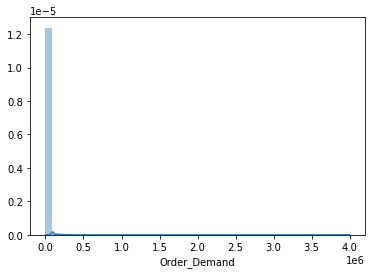

In [15]:
sns.distplot(df['Order_Demand'])

The above plot was clumsy. So let us make a logarithmic plot of the Order_Demand.

In [16]:
df['Order_Demand'] = np.log1p(df['Order_Demand'])

<AxesSubplot:xlabel='Order_Demand'>

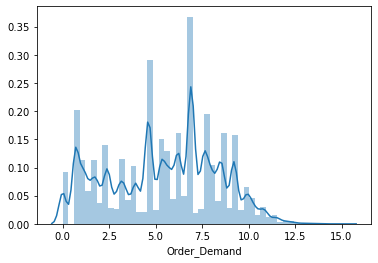

In [17]:
sns.distplot(df['Order_Demand'])

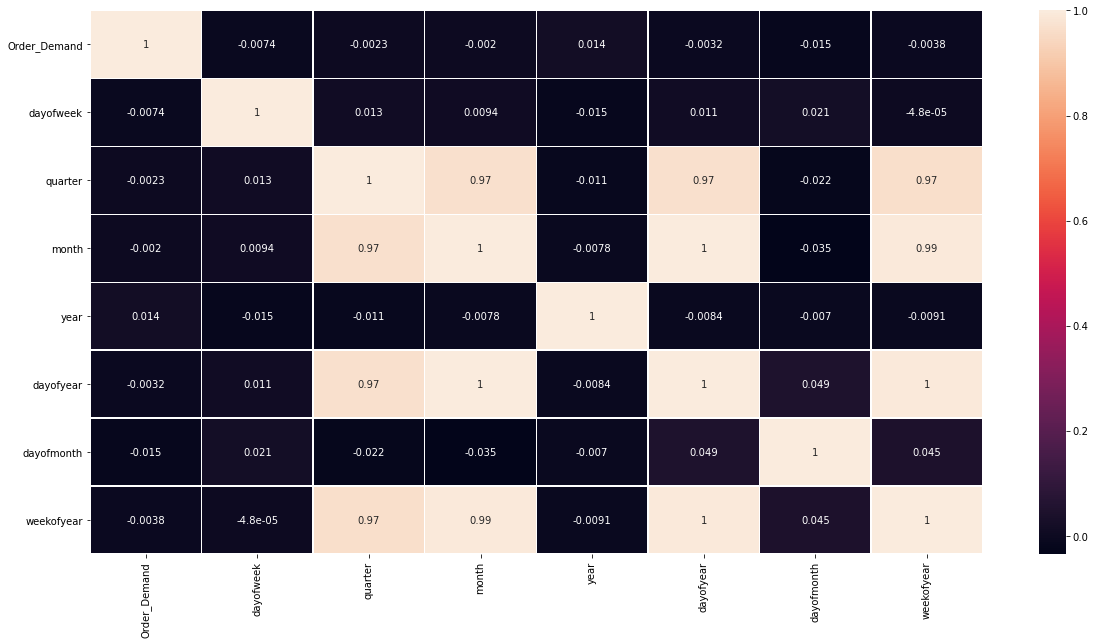

In [18]:
sns.heatmap(df.corr(), annot=True, linewidth=0.5)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

Note: From the above correlation, we can see that our Order_Demand(y) was positively correlated to only attribute of the dataset, which is 'year'.

# 3.a.Cummulative Monthly Order Demand

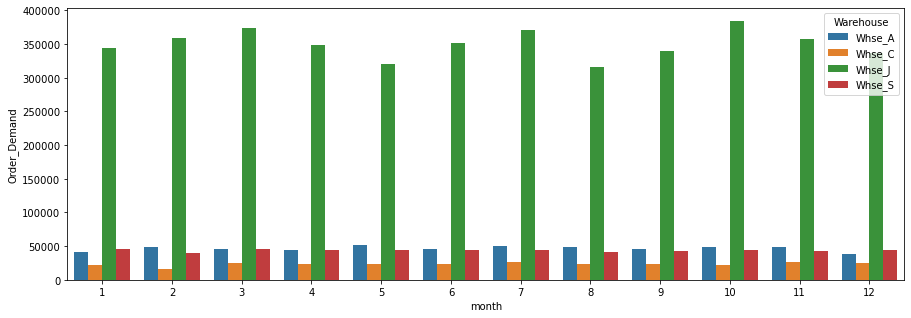

In [19]:
data = df.groupby(['Warehouse', 'month'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))

sns.barplot(x="month", y="Order_Demand",
            hue="Warehouse", data=data);

Analysis : It is pretty obvious from the graph that Warehouse_J is making the highest product-order_demand supplies. So lets keep our focus on Warehouse_J. But also at the same time we also need to look at what Product_Category is more demanded.

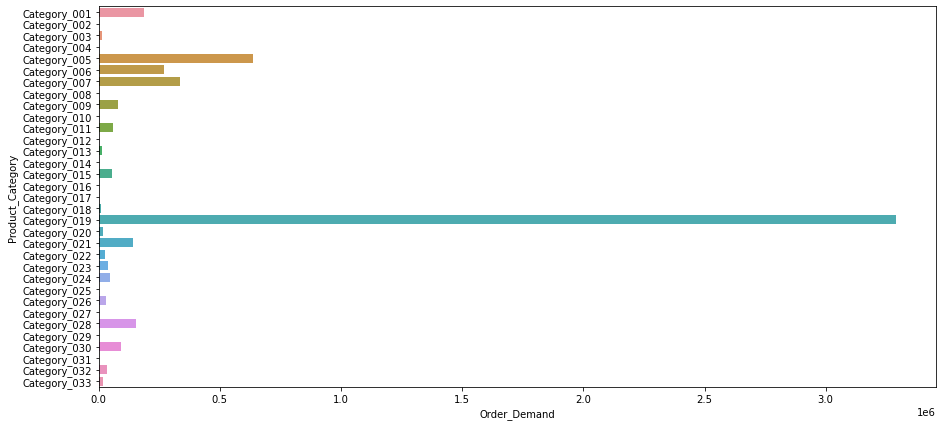

In [20]:
data = df.groupby('Product_Category')['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(y='Product_Category', x='Order_Demand', data=data);

Analysis: From the above bar graph, it is clear that Catergory_019 is having the higher order_demand. Now we shall shift our focus to Category_019 a bit more.

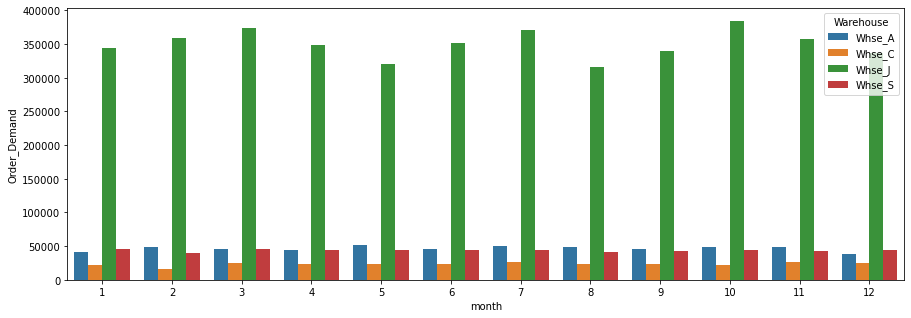

In [21]:
data = df[df['Product_Category'] == 'Category_019']
data = df.groupby(['Warehouse', 'month'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='month', y='Order_Demand',hue='Warehouse', data=data);

Analysis: From the above graph, we looked at how the order_demand is varying for the specific Category - Category_019 monthly wise from the Warehouses. The result is pretty clear. The category - Category_019 from Warehouse_J is having more demand compared to other categories and also from other warehouses.

# 3.b.Yearly Order Demand

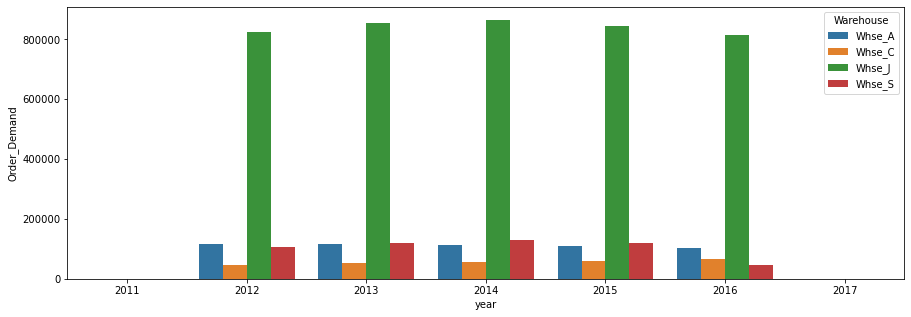

In [22]:
data = df.groupby(['Warehouse', 'year'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='year', y='Order_Demand', data=data, hue='Warehouse');

# 3.c.Quarterly Order Demand

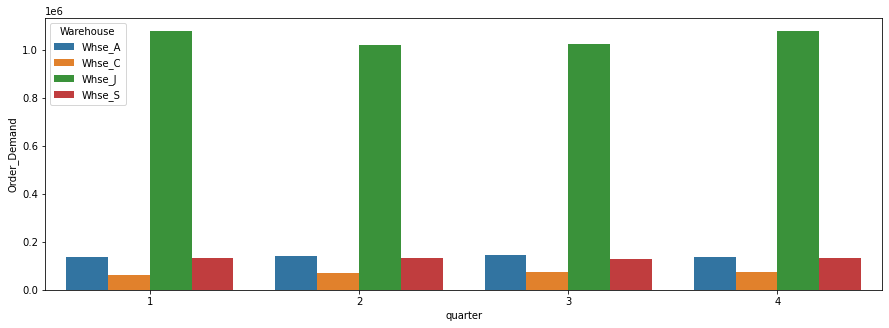

In [23]:
data = df.groupby(['Warehouse', 'quarter'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='quarter', y='Order_Demand', data=data, hue='Warehouse');

The last quarter has increasing trend of the order_demand. We can say that the last quarter has special ocassions and so the demand increased.

# 3.d.Week of the year demands

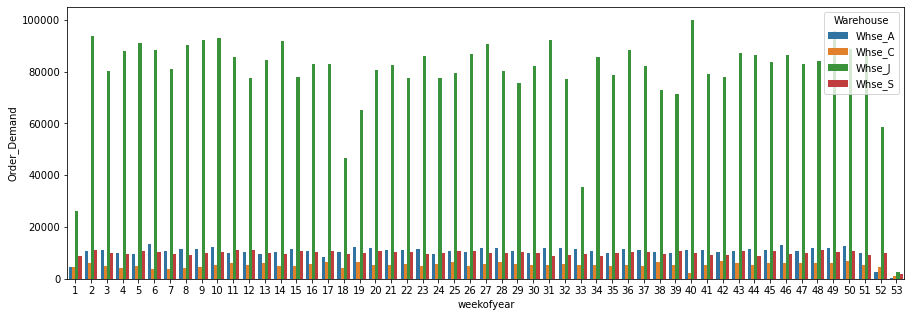

In [24]:
data = df.groupby(['Warehouse', 'weekofyear'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='weekofyear', y='Order_Demand', data=data, hue='Warehouse');

Now lets look at which product has the highest demand. Which product was most ordered by the people.

In [25]:
data = df.groupby('Product_Code')['Order_Demand'].sum()
data.sort_values(ascending=False)[:5]

Product_Code
Product_1359    152921.977611
Product_1295     88382.042627
Product_1378     79600.247603
Product_1286     73758.810252
Product_1382     72307.749721
Name: Order_Demand, dtype: float64

So Product_1359 was the most ordered products amongst all. So lets shift our focus to the particular product Product_1359 and see when it was most ordered - dayofweek, dayofmonth, month, year, quarter, weekofyear, etc.

# 4.a.Particular Product vs DayofWeek

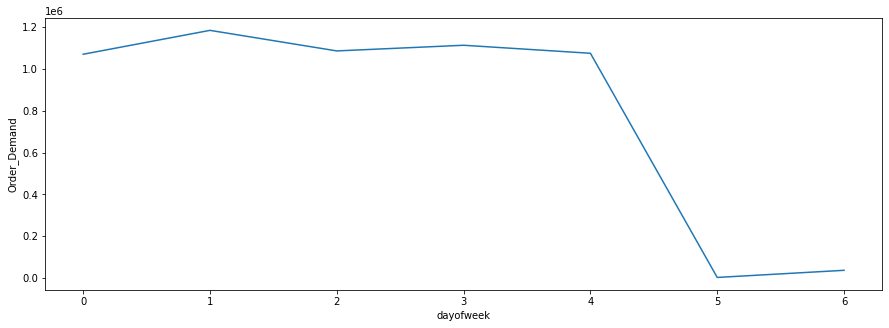

In [26]:
data = df[df['Product_Code'] == 'Product_1359']
data = df.groupby(['dayofweek'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='dayofweek', y='Order_Demand', data=data);

Analysis: The product Product_1359 was mostly ordered from Sundays to Thursdays.

# 4.b.Particular product vs DayofMonth

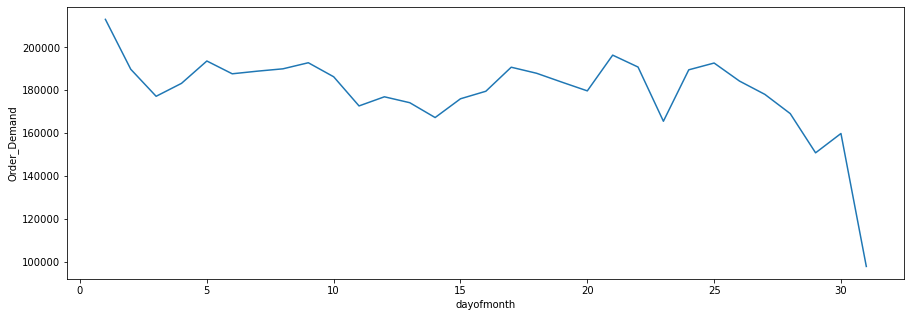

In [27]:
data = df.groupby(['dayofmonth'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='dayofmonth', y='Order_Demand', data=data);

Analysis: The product_1359 was mostly ordered on the beginning of the month. May be because it was a paycheck day. There was a significant drop after two weeks. Reason might be the people ordering have bi-weekly paychecks and they wait till half of the month and then when they get their paycheck after two weeks, they will buy the product once again. That is why, there is a rise after 14th, 15th. Possible.

# 4.c.Particular product vs Month

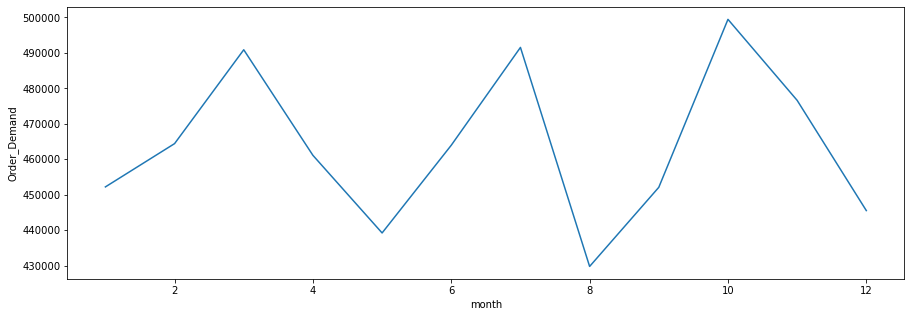

In [28]:
data = df.groupby(['month'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='Order_Demand', data=data);

# 4.d.Particular product vs year

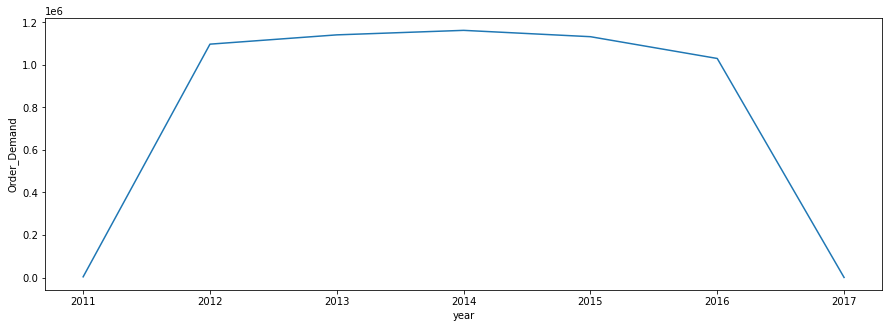

In [29]:
data = df.groupby(['year'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='year', y='Order_Demand', data=data);

Analysis: The product has high demand during 2012-2014. After that the product showed a slight decrease from 2014-2016 and in 2016-2017 there was a fall.

# 4.e.Particular product vs quarterly orders

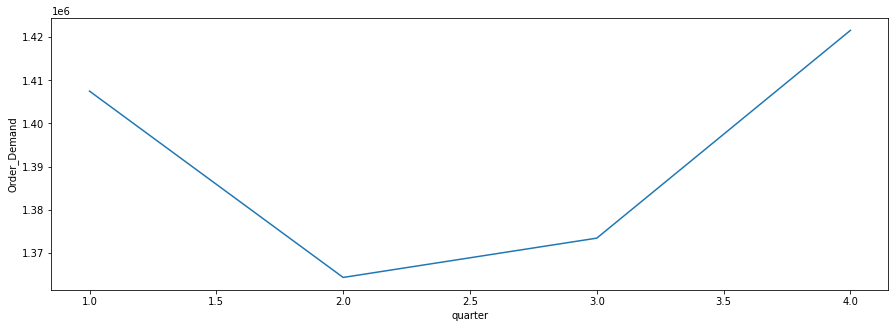

In [30]:
data = df.groupby(['quarter'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='quarter', y='Order_Demand', data=data);

Analysis: A bit more demand during the last quarter. May be because of Thanksgiving, Black Friday and Christmas deals.

# 5. Time Series Analysis - Product_1359

Now we are going to do time series analysis on the particular product Product_1359. Let us forecast its performance in the future based on previous information by making shifts.

In [31]:
df = df[df['Product_Code'] == 'Product_1359']
cols = ['Date', 'Warehouse', 'Order_Demand',
        'dayofweek', 'month', 'year', 'dayofmonth', 'weekofyear']
df = df[cols]

# a. Label Encoding the Warehouses

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Warehouse'])
df['Warehouse'] = le.transform(df['Warehouse'] )

In [33]:
x = df.drop(['Order_Demand', 'Date'], axis=1).copy()
y = df['Order_Demand'].copy()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 6. XGBoost

In [35]:
import xgboost as xgb

model = xgb.XGBRegressor(seed=0)
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [36]:
def root_mean_squared_error(y_true, y_pred):
    """Calculates RMSE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return ((y_true - y_pred) ** 2).mean() ** .5


y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE : {rmse:.2f}')

RMSE : 1.62


# 6. Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(10)

,Actual,Predicted
890915,10.126671,9.125064
707831,8.517393,8.974640
516843,9.210440,8.940091
963535,9.210440,9.058524
755784,7.601402,9.082579
430615,10.819798,9.043454
63995,8.517393,8.943904
469699,7.601402,9.107878
677789,9.210440,8.964924
314092,8.294300,8.989151


# 8. Results - Analysis

The y_test values and y_pred values are very close to each other. Linear Regression has yielded better results in Time Series.

In [41]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2540754209825011
Mean Squared Error: 2.466375863444302
Root Mean Squared Error: 1.5704699498698795


# Approach 2

In [42]:
prodDF = pd.read_csv('D:/Data Mining EECS 731/world_wide_products_inc/notebook/datasets/Historical Product Demand.csv', encoding='utf-8')

In [43]:
prodDF.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [44]:
# Group by products and order by count to get the max demand for a particular product

grpByProdRslt = prodDF.groupby(['Product_Code']).size().reset_index(name='counts').sort_values(['counts'],ascending=False)
grpByProdRslt.head(10)

,Product_Code,counts
1348,Product_1359,16936
1284,Product_1295,10575
1367,Product_1378,9770
619,Product_0620,9428
1275,Product_1286,8888
1371,Product_1382,8619
1442,Product_1453,8503
1283,Product_1294,8384
1366,Product_1377,7872
1276,Product_1287,7829


In [45]:
# Select Product 1359 for forecasting - high count
prod1359DF = prodDF.loc[prodDF['Product_Code'] == 'Product_1359'].sort_values(['Date'],ascending=False)
prod1359DF.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,16936,16936,16936,16936,16936
unique,1,1,1,1232,161
top,Product_1359,Whse_J,Category_019,2013/1/7,1000
freq,16936,16936,16936,35,2578


In [46]:
# Drop remaining columns
prod1359DF = prod1359DF.drop(columns=['Warehouse','Product_Code','Product_Category'])

In [47]:
prod1359DF.index=pd.to_datetime(prod1359DF.Date,format='%Y/%m/%d') 
prod1359DF.drop(columns=['Date'],inplace=True)

In [48]:
prod1359DF['Order_Demand'] = prod1359DF['Order_Demand'].astype(str)
prod1359DF['Order_Demand'] = prod1359DF['Order_Demand'].map(lambda x: x.lstrip('(').rstrip(')'))
prod1359DF['Order_Demand'] = prod1359DF['Order_Demand'].astype(int)

In [49]:
#Aggregate the Date Columns by month for forecast

prod1359DmndMnth = prod1359DF.resample('M').sum()
prod1359DmndMnth.head(10)

,Order_Demand
Date,
2012-01-31,8911000
2012-02-29,8131000
2012-03-31,7775000
2012-04-30,8960000
2012-05-31,8475000
2012-06-30,6556000
2012-07-31,7422000
2012-08-31,6667000
2012-09-30,8349000


In [50]:
# Remove the last month data - Its incomplete
prod1359DmndMnth.drop(prod1359DmndMnth.loc[prod1359DmndMnth['Order_Demand']==100000].index,inplace=True)

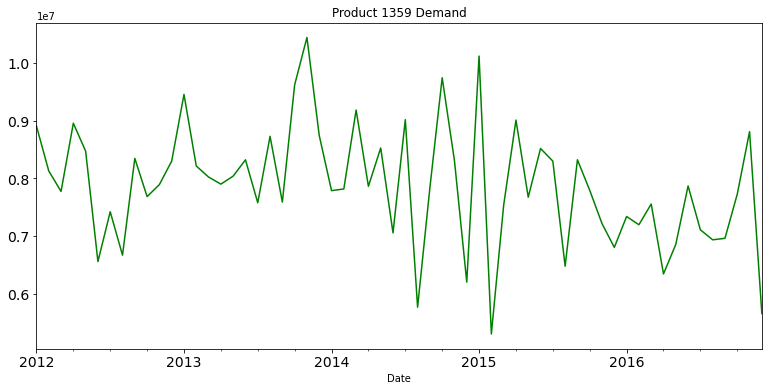

In [51]:
# Product demand for each year

prod1359DmndMnth.Order_Demand.plot(figsize=(13,6), title= 'Product 1359 Demand', fontsize=14,color="Green")
plt.show()

In [52]:
# Create Train and Test Data - Test is last 9 months

prod1359Train = prod1359DmndMnth[:'2016-03-31']
prod1359Test = prod1359DmndMnth['2016-04-30':]

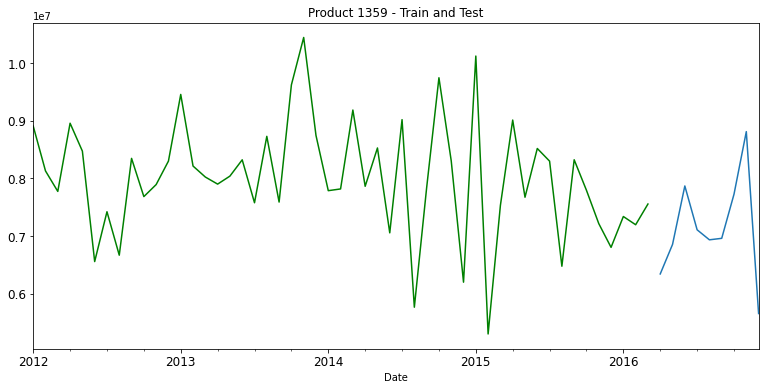

In [53]:
#Demand for product 1359
prod1359Train.Order_Demand.plot(figsize=(13,6), title= 'Product 1359 - Train and Test', fontsize=12,color="Green")
prod1359Test.Order_Demand.plot(figsize=(13,6), title= 'Product 1359 - Train and Test', fontsize=12)
plt.show()

c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


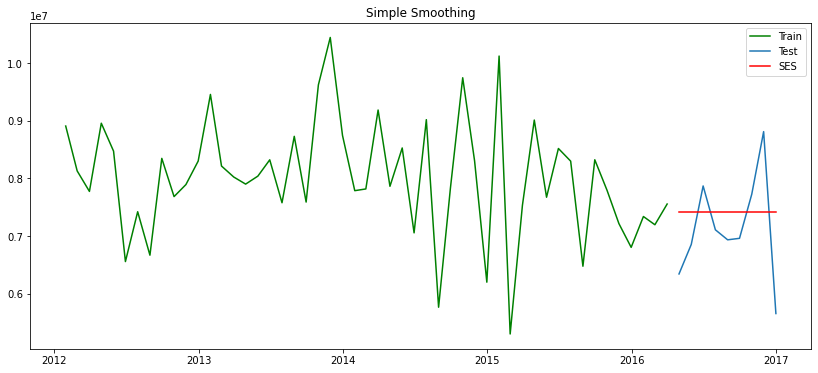

In [54]:
# Simple Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = prod1359Test.copy()
fit2 = SimpleExpSmoothing(np.asarray(prod1359Train['Order_Demand'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(prod1359Test))
plt.figure(figsize=(14,6))
plt.plot(prod1359Train['Order_Demand'], label='Train',color="Green")
plt.plot(prod1359Test['Order_Demand'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES',color="Red")
plt.title("Simple Smoothing")
plt.legend(loc='best')
plt.show()

In [55]:
import math
from sklearn.metrics import mean_squared_error
smooth_rms = math.sqrt(mean_squared_error(prod1359Test.Order_Demand, y_hat_avg.SES))
print(smooth_rms)

905476.4628886498


c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


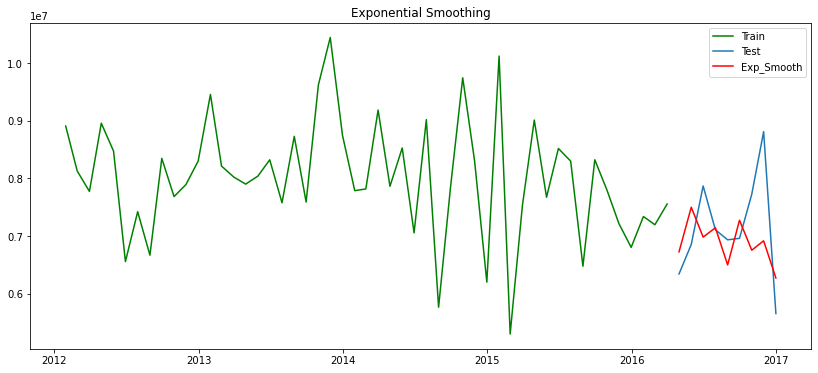

In [62]:
# Exponential Smoothing

exp_hat_avg = prod1359Test.copy()
fit1 = ExponentialSmoothing(np.asarray(prod1359Train['Order_Demand'].astype(np.double)) ,seasonal_periods=4 ,trend='additive', seasonal='additive',).fit()
exp_hat_avg['Exp_Smooth'] = fit1.forecast(len(prod1359Test))
plt.figure(figsize=(14,6))
plt.plot( prod1359Train['Order_Demand'], label='Train',color="Green")
plt.plot(prod1359Test['Order_Demand'], label='Test')
plt.plot(exp_hat_avg['Exp_Smooth'], label='Exp_Smooth',color="Red")
plt.legend(loc='best')
plt.title("Exponential Smoothing");
plt.show()

In [57]:
import math
from sklearn.metrics import mean_squared_error

exp_rms = math.sqrt(mean_squared_error(prod1359Test.Order_Demand, exp_hat_avg.Exp_Smooth))
print(exp_rms)

854713.5426940584


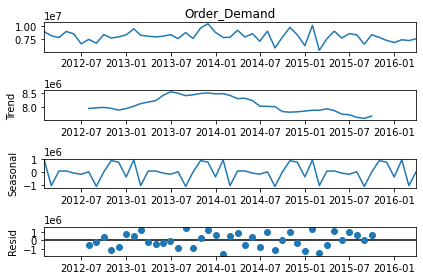

In [58]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(prod1359Train.Order_Demand).plot()
result = sm.tsa.stattools.adfuller(prod1359Train.Order_Demand)
plt.show()

c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until


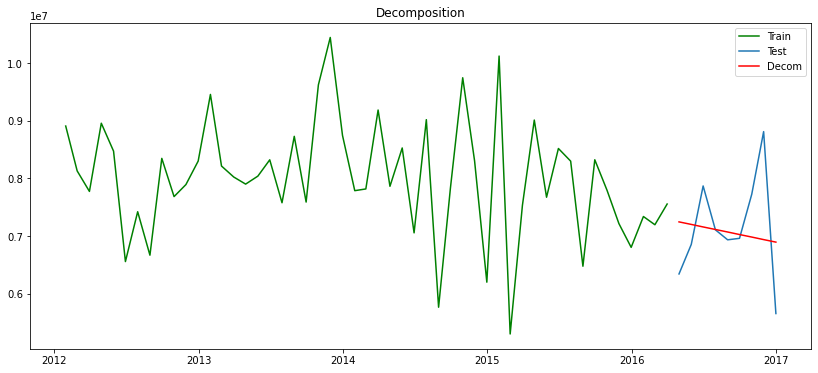

In [59]:
decom_hat_avg = prod1359Test.copy()

fit1 = Holt(np.asarray(prod1359Train['Order_Demand']).astype(np.double)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
decom_hat_avg['Decom'] = fit1.forecast(len(prod1359Test))

plt.figure(figsize=(14,6))
plt.plot(prod1359Train['Order_Demand'], label='Train',color="Green")
plt.plot(prod1359Test['Order_Demand'], label='Test')
plt.plot(decom_hat_avg['Decom'], label='Decom',color="Red")
plt.legend(loc='best')
plt.title("Decomposition");
plt.show()

In [60]:
import math
from sklearn.metrics import mean_squared_error

decom_rms = math.sqrt(mean_squared_error(prod1359Test.Order_Demand, decom_hat_avg.Decom))
print(decom_rms)

887206.101543026


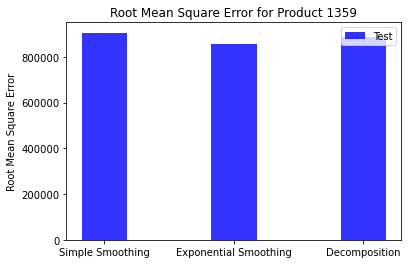

In [61]:
# Plot the Mean Square Error for Comparison
n_groups = 3
test_mse = (smooth_rms,exp_rms,decom_rms)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
 
rects2 = plt.bar(index + bar_width, test_mse, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Test')
 
plt.ylabel('Root Mean Square Error')
plt.title('Root Mean Square Error for Product 1359')
plt.xticks(index + bar_width, ('Simple Smoothing', 'Exponential Smoothing', 'Decomposition'))
plt.legend()

# 9. Conclusion

We can also do some analysis using Facebook prophet - fbprophet. It has particular functions that will give predictions for the desired duration like 365 days, 2 years by adding dataframes to the dataset.